# Logistic Regression

# Importing the libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [4]:
dataset = pd.read_csv('breast_cancer.csv')

Aim is to predict wethere the patient has breast cancer or not

In [5]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
dataset.shape

(683, 11)

Ckeck of missing values

In [7]:
dataset.isnull().any()

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [15]:
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

## Spliting the dataset into Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Training the Logistic Regression model on Training set

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [21]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]]


## Making the Confusion Matrix

Confusion Matrix:
[[84  3]
 [ 3 47]]
Accuracy Score = 95.62%


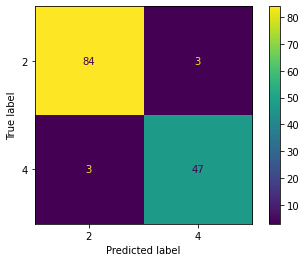

In [35]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
plot_confusion_matrix(classifier, x_test, y_test)
plt.plot()
print(f'Accuracy Score = {round(accuracy_score(y_test, y_pred)*100,2)}%')

## Confusing the accuracy using k-fold Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print('Accuracy {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation {:.2f} %'.format(accuracies.std()*100))

Accuracy 96.70 %
Standard Deviation 1.97 %
